# Make proper digital notes

prefix(polish notation)

Postfix (reverse polish)

evaluate postfix expression, we have already seen how to convert postfix expression to expression tree, and calculate the value of expression tree

https://leetcode.com/problems/evaluate-reverse-polish-notation/description/

//it is very easy to evaluate postfix/reverse polish notation

In [ ]:
int evalRPN(vector<string>& vos) {
    stack<int> st;
    for(string s: vos){
        if(s=="+" or s=="-" or s=="/" or s=="*"){
            //the order is very important
            int op2=st.top();
            st.pop();
            int op1=st.top();
            st.pop();
            switch(s[0]){
                case '+':
                    st.push(op1+op2);
                    break;
                case '-':
                    st.push(op1-op2);
                    break;
                case '*':
                    st.push(op1*op2);
                    break;
                case '/':
                    st.push(op1/op2);
                    break;                    
            }
        }
        else{
            st.push(stoi(s));
        }
    }
    return st.top();
}
//this is very similar to conversion to expression tree

Given the postfix tokens of an arithmetic expression, build and return the binary expression tree that represents this expression.

https://leetcode.com/problems/design-an-expression-tree-with-evaluate-function/description/

In [ ]:
/**
 * This is the interface for the expression tree Node.
 * You should not remove it, and you can define some classes to implement it.
 */

 class Node {
    public:
        virtual ~Node () {};
        virtual int evaluate() const = 0;
    protected:
        // define your fields here
    };
    
    
    /**
     * This is the TreeBuilder class.
     * You can treat it as the driver code that takes the postinfix input 
     * and returns the expression tree representing it as a Node.
     */
    
    class TreeBuilder {
    public:
        Node* buildTree(vector<string>& postfix) {
            
        }
    };
    
    
    /**
     * Your TreeBuilder object will be instantiated and called as such:
     * TreeBuilder* obj = new TreeBuilder();
     * Node* expTree = obj->buildTree(postfix);
     * int ans = expTree->evaluate();
     */

In [ ]:
class Node {
public:
    virtual ~Node () {};
    virtual int evaluate() const = 0;
protected:
    // define your fields here
};

class CustomNode : public Node {
public:
    string val;
    Node *left, *right;

    CustomNode(string v) : val(v), left(nullptr), right(nullptr) {}

    int evaluate() const override {
        if (val == "+") return left->evaluate() + right->evaluate();
        if (val == "-") return left->evaluate() - right->evaluate();
        if (val == "*") return left->evaluate() * right->evaluate();
        if (val == "/") return left->evaluate() / right->evaluate();
        return stoi(val); // it's a number
    }
};


/**
 * This is the TreeBuilder class.
 * You can treat it as the driver code that takes the postinfix input 
 * and returns the expression tree representing it as a Node.
 */

class TreeBuilder {
public:

Node* postfixToExpressionTree(vector<string>& postfix) {
    if (postfix.empty()) {
        return nullptr;
    }

    stack<CustomNode*> s;

    for (string st : postfix) {
        if (st=="+" or st=="-" or st=="/" or st=="*") { 
            CustomNode* rightChild = s.top();
            s.pop();
            CustomNode* leftChild = s.top();
            s.pop();

            CustomNode* operatorNode = new CustomNode(st);
            operatorNode->left = leftChild;
            operatorNode->right = rightChild;
            s.push(operatorNode);
        } 
        else{
            s.push(new CustomNode(st));
        }
    }
    return s.top();
}

    Node* buildTree(vector<string>& postfix) {
        return postfixToExpressionTree(postfix);
    }
};

In [ ]:
int evaluateExpression(BinaryTreeNode<string> *node) {
	if(!node) return 0;
	if(!node->left and !node->right) return stoi(node->data);
	int lVal=evaluateExpression(node->left);
	int rVal=evaluateExpression(node->right);
	if (node->data == "+") return lVal + rVal;
	if (node->data == "-") return lVal - rVal;
	if (node->data == "*") return lVal * rVal;
	return lVal / rVal;
}

as we can easily make, postfix-> expression tree, then do inorder or preorder traversal

infix <- postfix

prefix <- postfix

imoimpimpimpimp

infix-> postfix

https://www.geeksforgeeks.org/problems/infix-to-postfix-1587115620/1

with brackets

In [ ]:
mug up algorithm

striver

https://youtu.be/4pIc9UBHJtk?si=5vd_pbRndA5t2HSU

In [ ]:
int prec(char c){
    if(c=='^') return 3;
    if(c=='*' or c=='/') return 2;
    if(c=='+' or c=='-') return 1;
    return 0;
}


string infixToPostfix(string s) {
    string ans;
    stack<char> st;
    for(char c: s){
        if(isalnum(c)) ans.push_back(c);
        //if its operand add it to the answer
        else if(c=='(') st.push(c);
        //if it is an opening bracket, push it onto the stack
        //( will not be going to answer
        else if(c==')'){
            while(st.size() and st.top()!='('){
                ans.push_back(st.top());
                st.pop();
            }
            st.pop();//removing '(' corresponding to ')'
        }
        else{
            //if it is an operator
            //pop all the operators from the stack which have greater or equal precedence
            //and add them to the answer
            //then push the current operator onto the stack
            while(st.size() and prec(st.top())>=prec(c)){
                ans.push_back(st.top());
                st.pop();
            }
            st.push(c);
        }
    }
    
    while(st.size()){
        ans.push_back(st.top());
        st.pop();
    }
    return ans;
}

imoimpimpimpimp

same as above

https://leetcode.com/problems/basic-calculator/description/

same as above

https://leetcode.com/problems/basic-calculator-ii/

In [ ]:
int prec(char c){
    if(c=='^') return 3;
    if(c=='*' or c=='/') return 2;
    if(c=='+' or c=='-') return 1;
    return 0;
}

//brackets will be removed here
vector<string> i2p(string &s) {
    vector<string> ans;
    stack<string> st;
    int n = s.size();
    int i = 0;

    while(i<n){
        char c = s[i];
        string tmp;

        if(isdigit(s[i])) {
            while(i < n and isdigit(s[i])) {
                tmp.push_back(s[i]);
                i++;
            }
            ans.push_back(tmp);
        }
        else if(c == '('){
            st.push("(");
            i++;
        }
        else if(c == ')'){
            while(st.size() and st.top() != "(") {
                ans.push_back(st.top());
                st.pop();
            }
            if(st.size()) {
                st.pop();
            }
            i++;
        }
        else{
            while (st.size() && prec(st.top()[0]) >= prec(c)) {
                ans.push_back(st.top());
                st.pop();
            }
            string tmp(1,c);
            st.push(tmp);
            i++;
        }
    }

    while (st.size()) {
        ans.push_back(st.top());
        st.pop();
    }
        
    return ans;

}

void removeSpace(string &s){
    string ans;
    int n=s.size();
    for(int i=0;i<n;i++){
        if(s[i]!=' ') ans.push_back(s[i]);
    }
    s=ans;
}

void insertZero(string &s){
    string ans;
    int n=s.size();
    if(s[0]=='-') ans.push_back('0');
    for(int i=0;i<n;i++){
        ans.push_back(s[i]);
        if(i+1<n and s[i]=='(' and s[i+1]=='-'){
            ans.push_back('0');
        } 
    }
    s=ans;
}

int postfixEval(vector<string>& vos) {
    stack<int> st;
    for(string s: vos){
        if(s=="+" or s=="-" or s=="/" or s=="*"){
            int op2=st.top();
            st.pop();
            int op1=st.top();
            st.pop();
            switch(s[0]){
                case '+':
                    st.push(op1+op2);
                    break;
                case '-':
                    st.push(op1-op2);
                    break;
                case '*':
                    st.push(op1*op2);
                    break;
                case '/':
                    st.push(op1/op2);
                    break;                    
            }
        }
        else{
            st.push(stoi(s));
        }
    }
    return st.top();
}

int calculate(string s) {
    removeSpace(s);
    insertZero(s);
    vector<string> tmp= i2p(s);
    for(auto ss: tmp){
        cout<<ss<<endl;
    }
    return postfixEval(tmp);
}

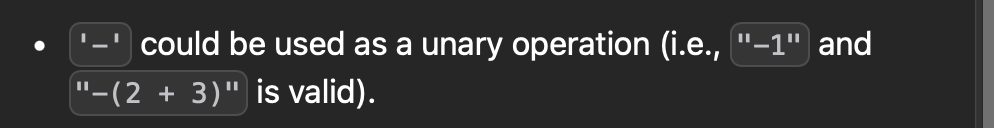

In [ ]:
    void insertZero(string &s){
        string ans;
        int n=s.size();
        if(s[0]=='-') ans.push_back('0');
        for(int i=0;i<n;i++){
            ans.push_back(s[i]);
            if(i+1<n and s[i+1]=='-' and !isdigit(s[i])){
                if(s[i]==')') ans.push_back('+');
                ans.push_back('0');
            } 
        }
        s=ans;
    }

prefix -> postfix

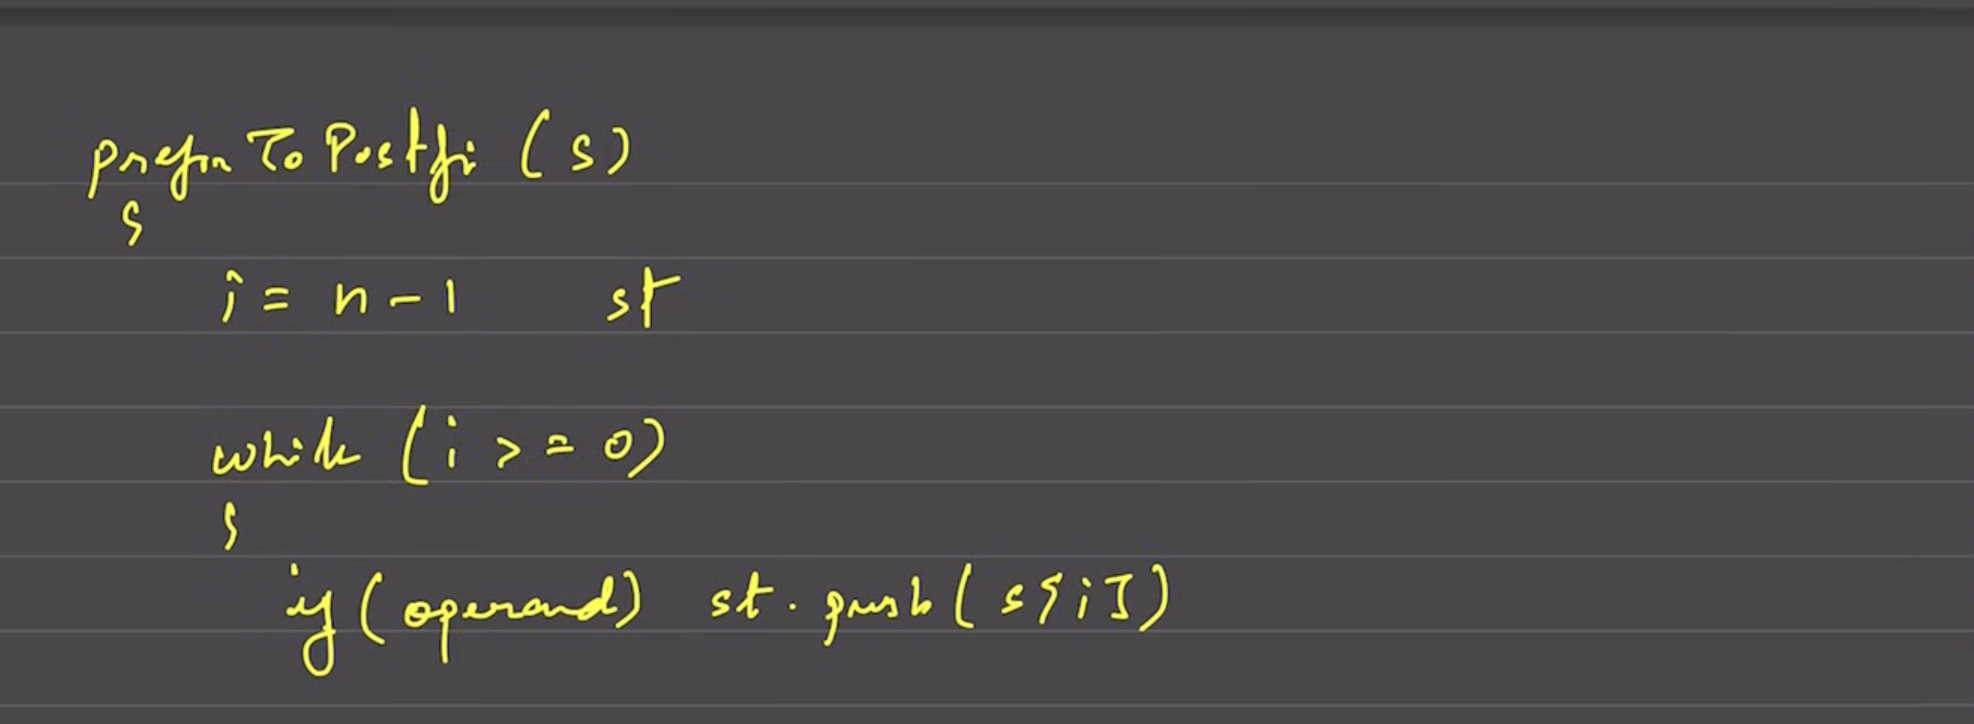

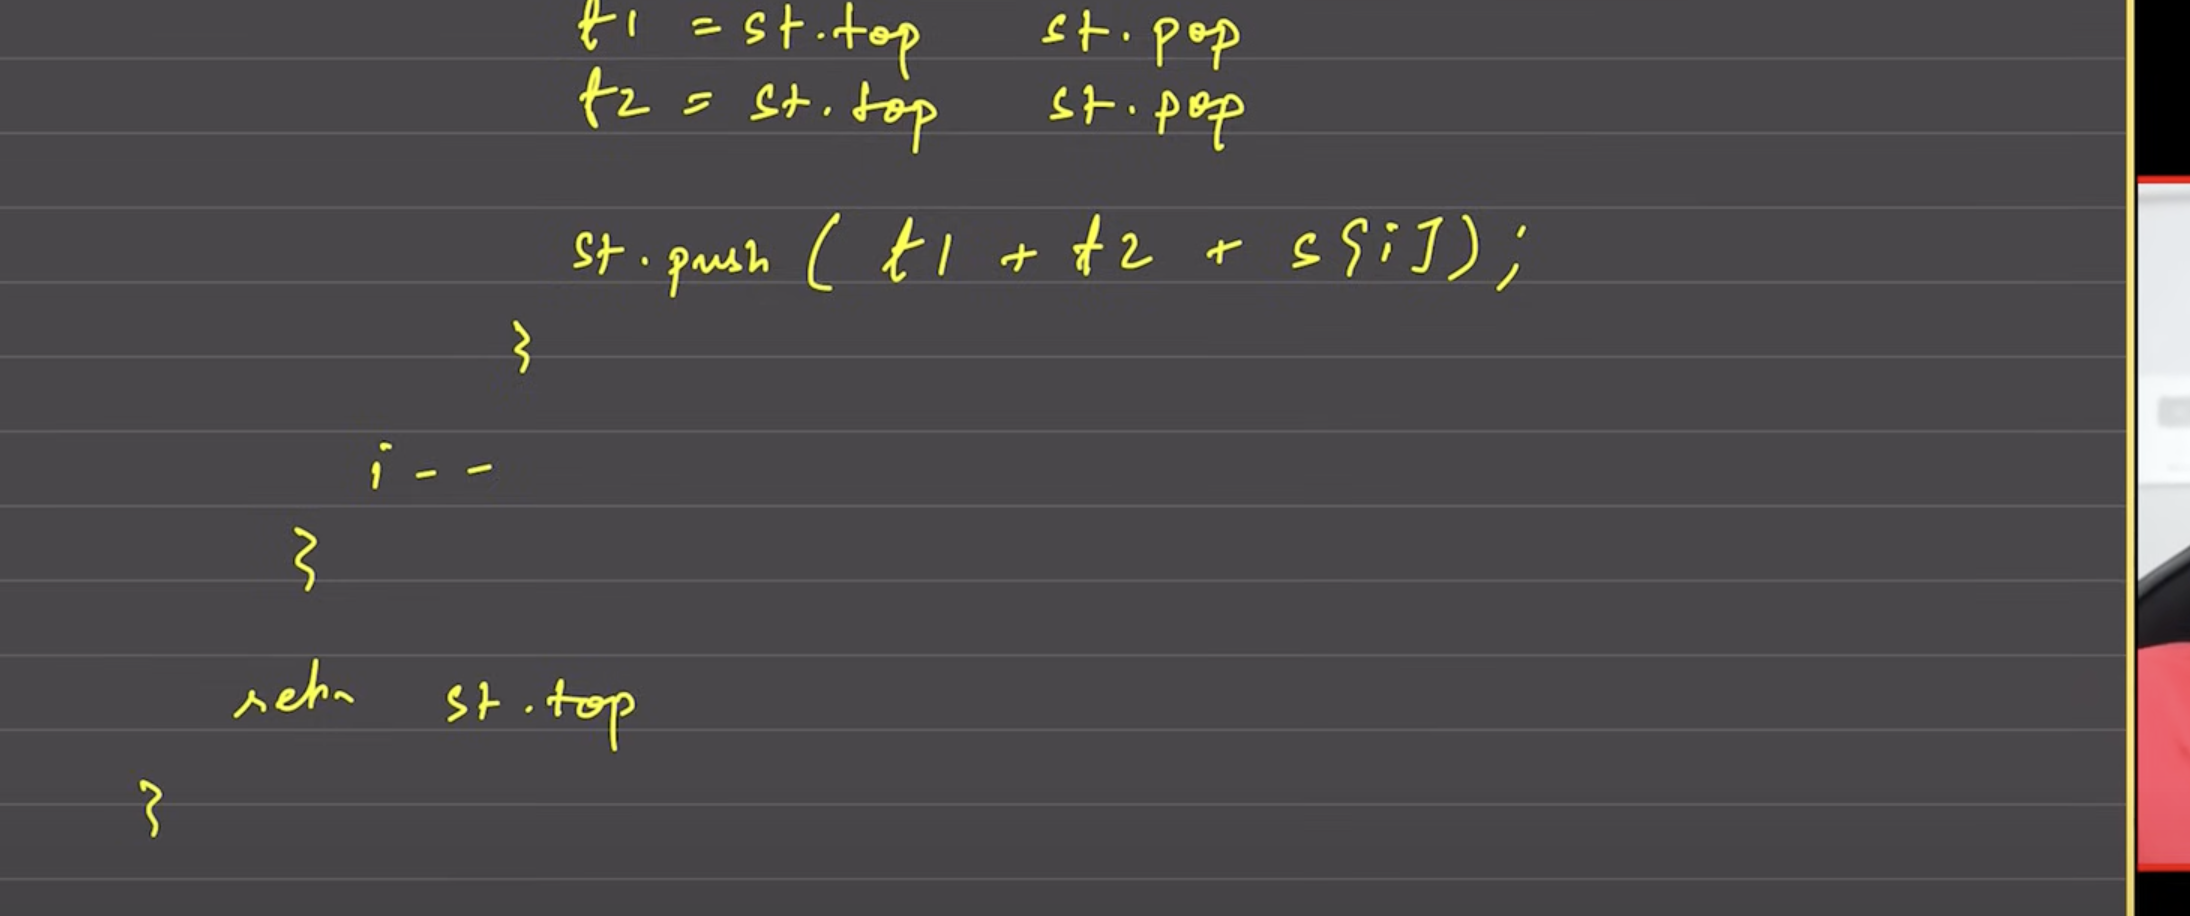

infix <-> prefix

infix <- prefix

https://practice.geeksforgeeks.org/problems/prefix-to-infix-conversion/1

In [ ]:
// just itirate from reverse
string preToInfix(string s) {
    stack<string> st;
    int n=s.size();
    for(int i=n-1;i>=0;i--){
        char c=s[i];
        if(c=='+' or c=='-' or c=='/' or c=='*'){
            string op1=st.top();
            st.pop();
            string op2=st.top();
            st.pop();
            st.push('('+op1+c+op2+')');                   
        }
        else{
            string myString(1, c);
            st.push(myString);
        }
    }
    return st.top();
}

infix -> prefix    

too tough

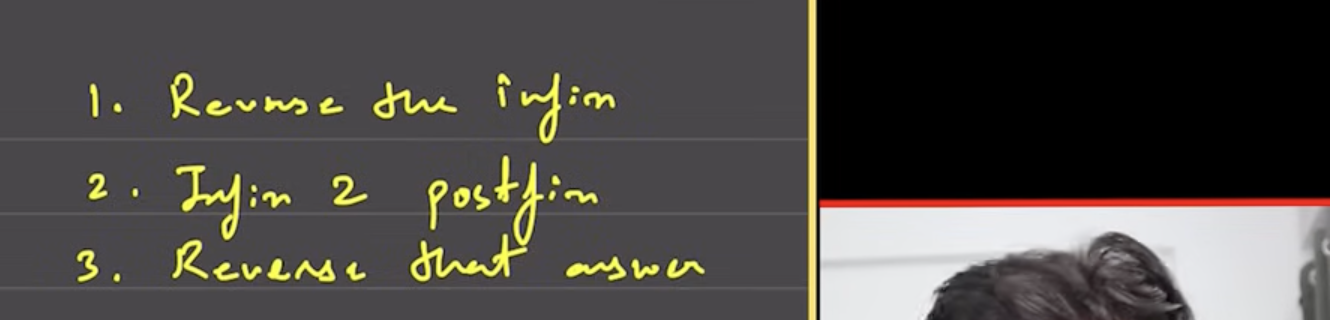

1. while reversing, also reverse the brackets

i2p with a change

In [ ]:
prec(st.top())>=prec(c)

In [ ]:
prec(st.top())>prec(c)

and

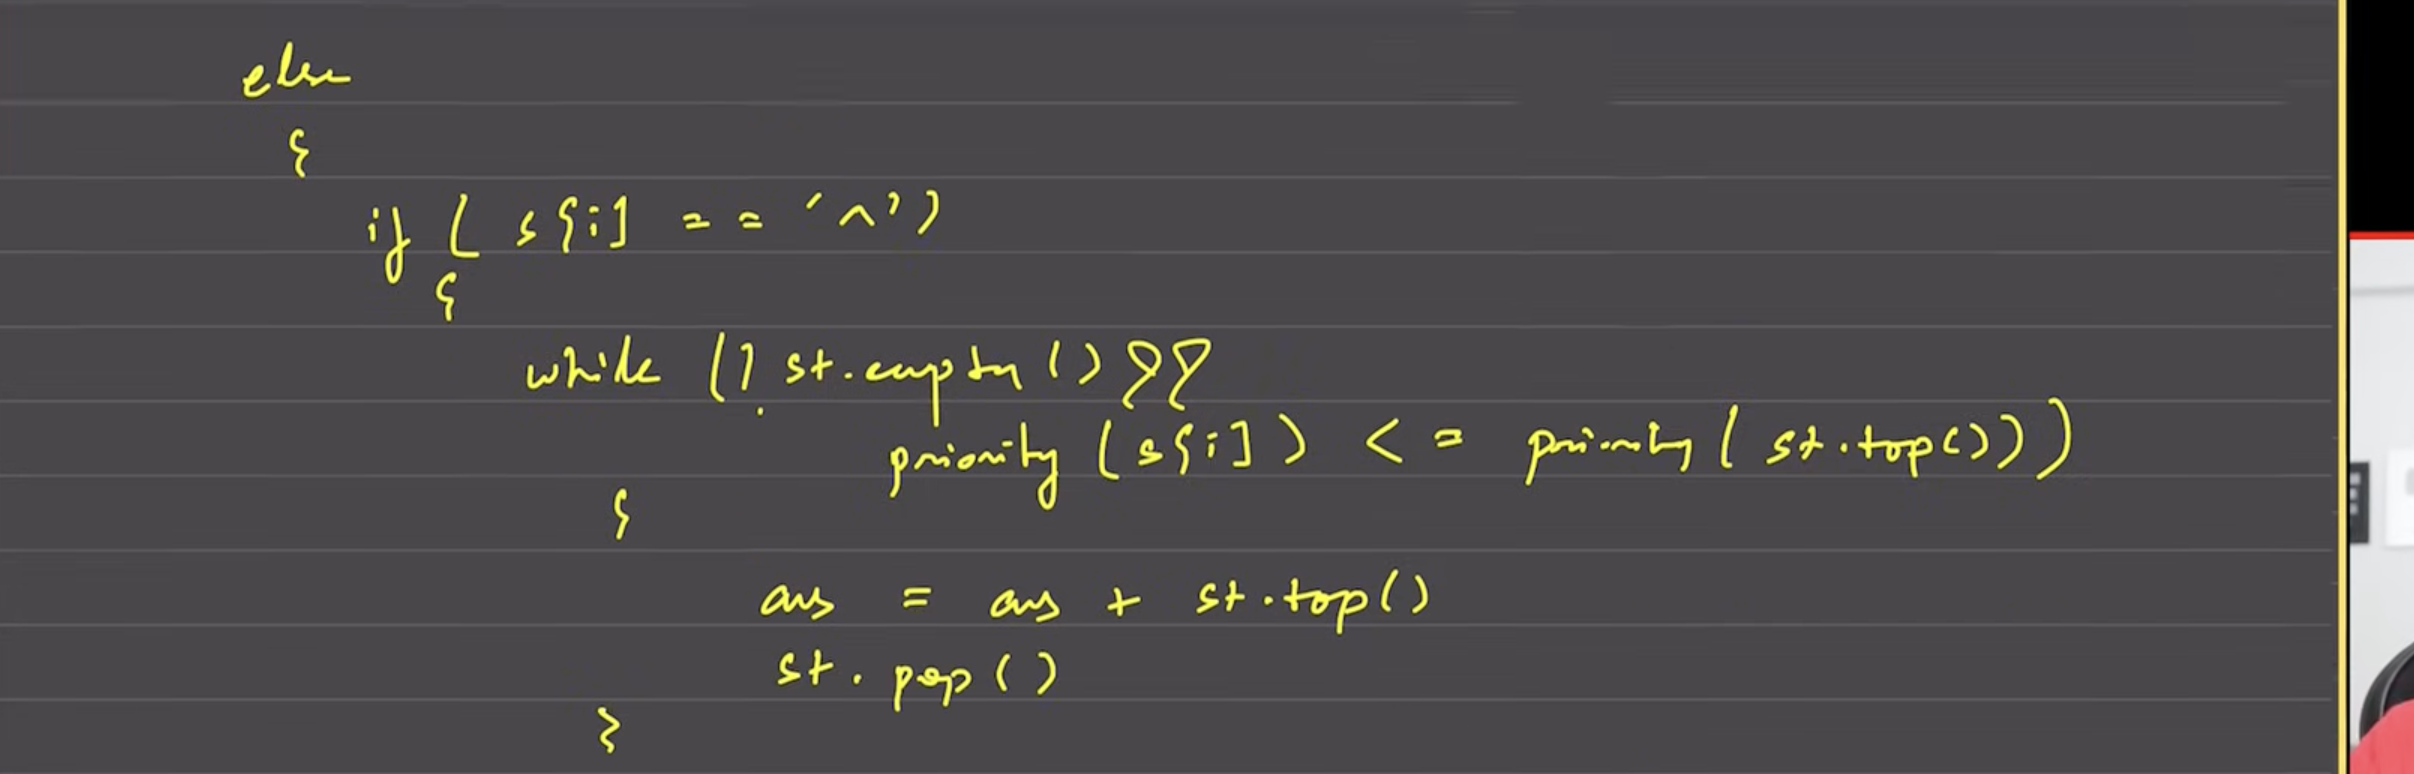

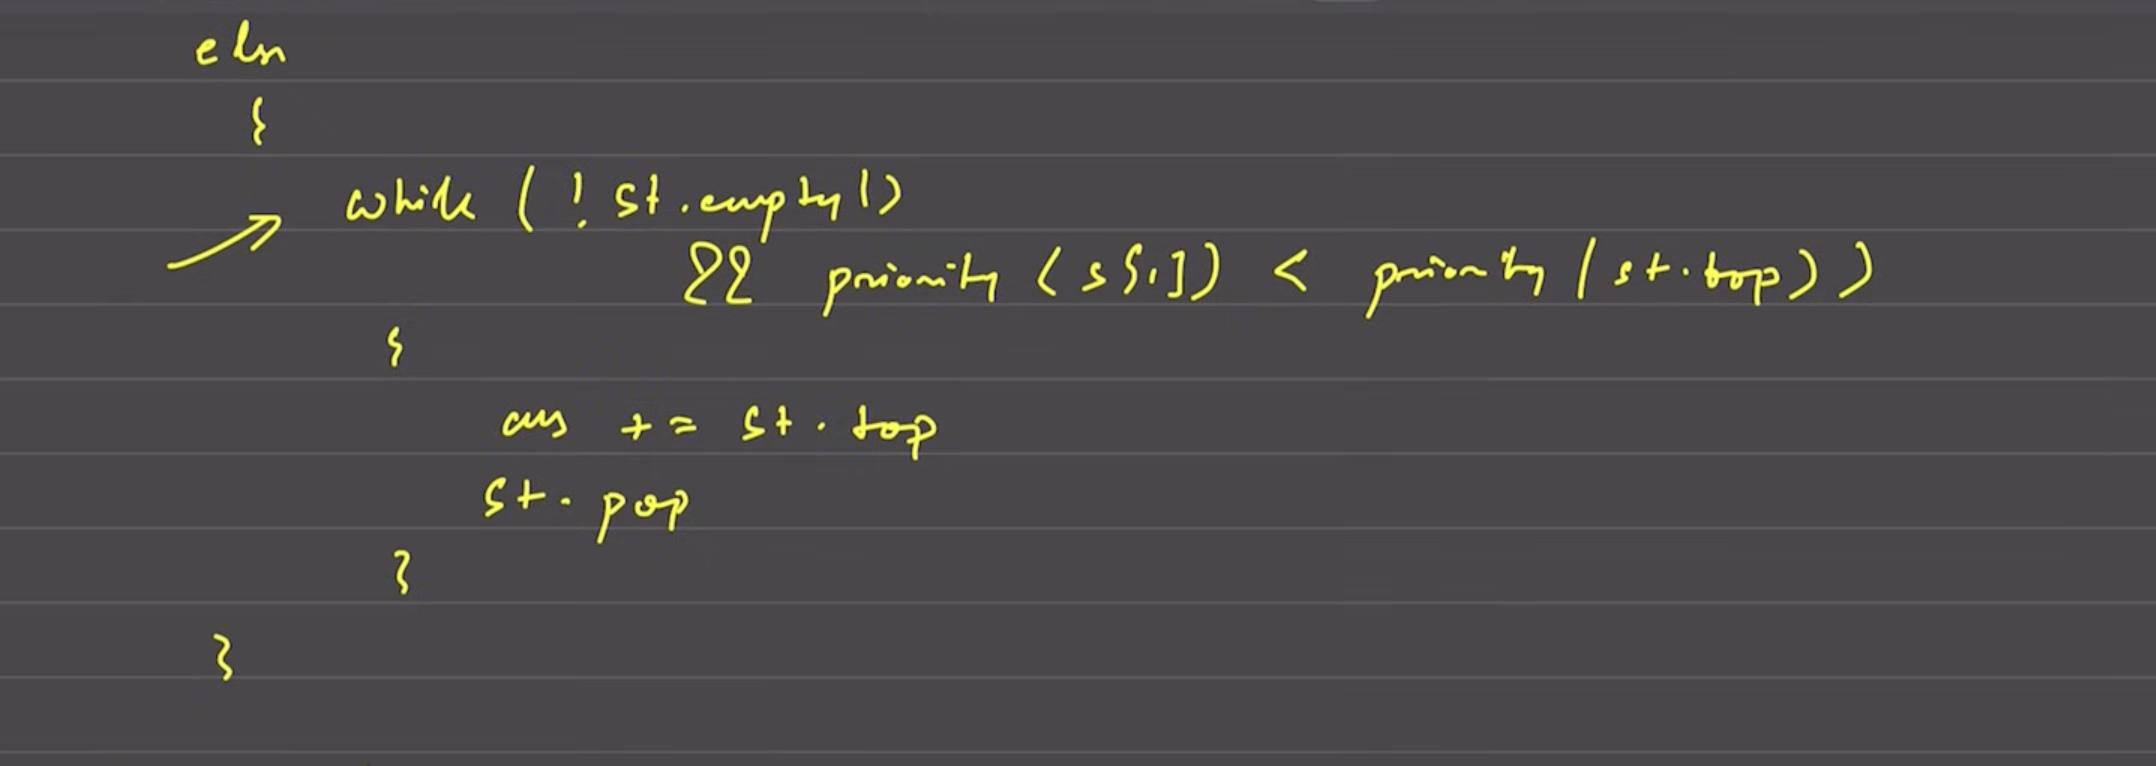